# Set up

In [1]:
import pandas as pd
import numpy as np
import json
import pickle

# Load training set

In [2]:
train_set = pd.read_pickle('train_set.pkl')
train_set

,claim,claimant,date,label,related_articles,id
9389,While arguing over President Reagan’s 1981 tax...,Sarah Sanders,2017-10-31,1,"[34218, 55700, 18736, 39031, 34219, 34220]",10354
1861,"Recently Rick Scott ""closed 30 women’s health ...",Lois Frankel,2014-09-12,0,"[73190, 76997, 38841, 77415, 77303, 9280, 8332...",2053
11035,Says Target installed urinals in a women’s bat...,Facebook posts,2016-04-22,0,"[9619, 22197]",12160
12221,"Says ""combined doses of vaccines"" have never b...",Facebook posts,2019-04-15,0,"[57163, 31528, 40908, 31536, 68904, 44601]",13458
11354,: The AMBER Alert system has been discontinu...,,2013-10-13,0,"[103978, 121475, 121849]",12504
...,...,...,...,...,...,...
2910,Health insurance costs for Floridians are up 3...,Republican Party of Florida,2014-09-23,1,"[9581, 89571, 7836, 7945, 7949, 77360, 83491, ...",3208
6096,"A photograph captures Harriet Tubman as a ""Gun...",,2019-03-25,0,"[125108, 125968, 126005]",6701
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",Jeanine Pirro,2014-06-14,0,"[80115, 93998, 5968, 175, 91475, 8710, 89881, ...",11514
5414,"""The board of a nonprofit organization on whic...",Tennessee Republican Party,2008-02-25,1,"[96453, 71123, 61, 69968, 96477]",5966


# Load test data

In [3]:
test_set = pd.read_pickle('test_set.pkl')

# Train model

In [4]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

Source: https://www.learndatasci.com/tutorials/predicting-reddit-news-sentiment-naive-bayes-text-classifiers/

In [5]:
X_train = train_set.claimant
y_train = train_set.label
X_test = test_set.claimant
y_test = test_set.label

In [6]:
# Create pipeline for the model
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [7]:
# Train the model
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [8]:
# Use model to make predictions
y_pred = model.predict(X_test)

In [9]:
# Check accuracy of model
accuracy_score(y_test, y_pred)

0.6155576984892318

In [10]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='macro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 61.56%

F1 Score: 45.75

Confusion Matrix:
 [[1173  270   11]
 [ 576  725   33]
 [ 173  133   17]]


In [11]:
counts = train_set.label.value_counts()
print(counts)

0    5954
1    5117
2    1373
Name: label, dtype: int64


In [12]:
print("\nPredicting only 0 = {:.2f}% accuracy".format(counts[0] / sum(counts) * 100))


Predicting only 0 = 47.85% accuracy


In [13]:
print("\nPredicting only 1 = {:.2f}% accuracy".format(counts[1] / sum(counts) * 100))


Predicting only 1 = 41.12% accuracy


In [14]:
print("\nPredicting only 2 = {:.2f}% accuracy".format(counts[2] / sum(counts) * 100))


Predicting only 2 = 11.03% accuracy


In [15]:
vect = CountVectorizer()

X_train_vect = vect.fit_transform(X_train)

In [16]:
list(zip(X_train_vect[1].toarray()[0], vect.get_feature_names()))

[(0, '103'),
 (0, '12'),
 (0, '2018'),
 (0, '21st'),
 (0, '24'),
 (0, '360'),
 (0, '55'),
 (0, '56'),
 (0, '57'),
 (0, '60'),
 (0, '67'),
 (0, '799'),
 (0, '84'),
 (0, '98'),
 (0, 'aaron'),
 (0, 'aarp'),
 (0, 'abbott'),
 (0, 'abc'),
 (0, 'abdikadir'),
 (0, 'abdul'),
 (0, 'abdullahi'),
 (0, 'abele'),
 (0, 'abia'),
 (0, 'abigail'),
 (0, 'abraham'),
 (0, 'abrams'),
 (0, 'abubakar'),
 (0, 'access'),
 (0, 'account'),
 (0, 'accountability'),
 (0, 'accountable'),
 (0, 'accounting'),
 (0, 'acenbrak'),
 (0, 'aclu'),
 (0, 'acosta'),
 (0, 'action'),
 (0, 'actionaid'),
 (0, 'activist'),
 (0, 'ad'),
 (0, 'adam'),
 (0, 'adams'),
 (0, 'addicting'),
 (0, 'aden'),
 (0, 'adler'),
 (0, 'administration'),
 (0, 'adrian'),
 (0, 'ads'),
 (0, 'adult'),
 (0, 'advent'),
 (0, 'affairs'),
 (0, 'afl'),
 (0, 'afp'),
 (0, 'africa'),
 (0, 'african'),
 (0, 'afrikan'),
 (0, 'afscme'),
 (0, 'against'),
 (0, 'agency'),
 (0, 'ahern'),
 (0, 'ahmednasir'),
 (0, 'aiken'),
 (0, 'ainsley'),
 (0, 'airline'),
 (0, 'aka'),
 (0, '

In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [18]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 5954), (1, 5954), (2, 5954)]


In [19]:
nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.5013996193035495

In [20]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

In [21]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='macro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 54.45%

F1 Score: 44.45

Confusion Matrix:
 [[1137  208  109]
 [ 545  480  309]
 [ 160   86   77]]


In [22]:
from sklearn.model_selection import ShuffleSplit

vect = CountVectorizer()
nb = MultinomialNB()

X = train_set.claimant
y = train_set.label

ss = ShuffleSplit(n_splits=10, test_size=0.2)
sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average='macro'))
    cms.append(confusion_matrix(y_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))


Average accuracy across folds: 55.14%

Average F1 score across folds: 44.83

Average Confusion Matrix across folds: 
 [[932.6 163.7  93.5]
 [423.1 378.  226.2]
 [136.1  74.   61.8]]


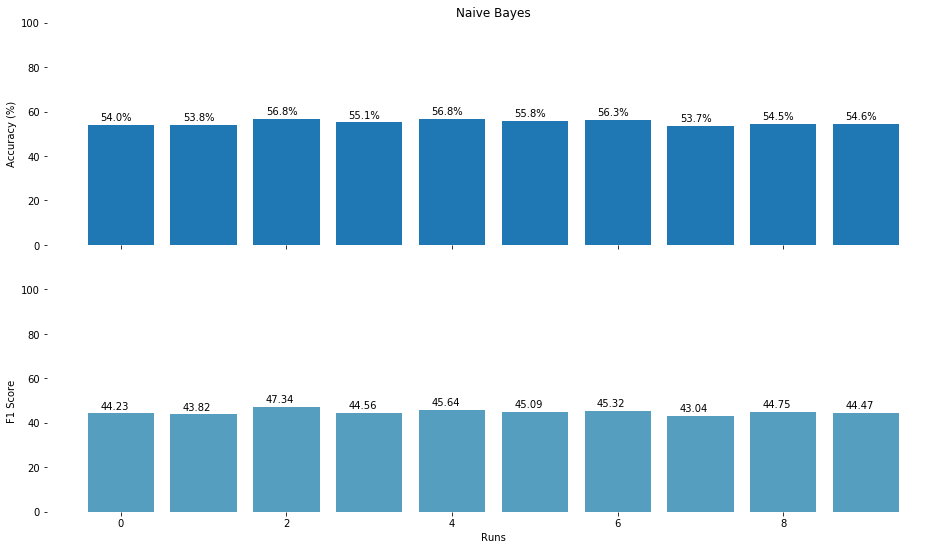

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()

In [24]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

X = train_set.claimant
y = train_set.label

cv = ShuffleSplit(n_splits=20, test_size=0.2)

models = [
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    MLPClassifier()
]

sm = SMOTE()

# Init a dictionary for storing results of each run for each model
results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}

for train_index, test_index in cv.split(X):
    X_train, X_test  = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_vect = vect.fit_transform(X_train)    
    X_test_vect = vect.transform(X_test)
    
    X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        cm = confusion_matrix(y_test, y_pred)
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)

/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alice/projects

/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alice/projects/fake-news-ai/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/alic

In [25]:
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        """
    print(s)

MultinomialNB
------------------------------
        Avg. Accuracy: 55.43%
        Avg. F1 Score: 45.13
        Avg. Confusion Matrix: 
        
[[934.35 168.55  95.4 ]
 [416.45 382.55 219.75]
 [136.2   73.05  62.7 ]]
        
BernoulliNB
------------------------------
        Avg. Accuracy: 39.21%
        Avg. F1 Score: 38.50
        Avg. Confusion Matrix: 
        
[[424.25 166.35 607.7 ]
 [186.25 377.25 455.25]
 [ 27.    70.45 174.5 ]]
        
LogisticRegression
------------------------------
        Avg. Accuracy: 41.58%
        Avg. F1 Score: 40.02
        Avg. Confusion Matrix: 
        
[[415.6  208.45 574.25]
 [180.35 467.5  370.9 ]
 [ 26.25  93.8  151.9 ]]
        
SGDClassifier
------------------------------
        Avg. Accuracy: 42.14%
        Avg. F1 Score: 40.34
        Avg. Confusion Matrix: 
        
[[417.75 215.5  565.05]
 [183.9  483.65 351.2 ]
 [ 25.75  98.85 147.35]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 41.38%
        Avg. F1 Sc